# Multiple Logistic Regression

Used literature:

 - [Plotting the decision boundary](https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24)

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read file with example data. It's made by my own. Hours for exam preparation per week and Average student's mark as x<sub>1</sub> and x<sub>2</sub> as well.

In [2]:
def read_data(filename):
    return pd.read_csv(filename)

Sigmoid function is used in order to map predicted values to probabilities.

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def design_matrix(x):
    return np.insert(x, 0, 1, axis=1)

def prediction(x, w):
    return sigmoid(design_matrix(x) * w.T)

Get total error on set.

In [4]:
def accuracy(x, w, y_train):
    return np.sum(abs(np.round(prediction(x_train, w), 0) - y_train)) / y_train.shape[0] * 100

Plot model with boundary line.

In [5]:
def plot_model(x_train, y_train, w):
    plt.xlabel('Hours per week')
    plt.ylabel('Average mark')
    
    x = [np.min(x_train[:,0]), np.max(x_train[:,0])]
    y = - (w.T[0] + w.T[1] * x) / w.T[2]

    plt.plot(x, np.array(y).flatten(), c='red')
    plt.scatter(np.array(x_train[:,0]).flatten(), np.array(x_train[:,1]).flatten(), c=np.vectorize({0: 'red', 1: 'blue'}.get)(np.array(y_train).flatten()), marker='x')

    plt.ylim(0, np.max(x_train[:,1]))
    plt.xlim(0, np.max(x_train[:,0]))
    plt.show()

Read data and make train set.

In [6]:
df = read_data('datasets/example_2.csv')

x_train = np.mat(df[['Hours per week', 'Average Mark']])
y_train = np.mat(df[['Passed']])

w = np.mat(np.zeros(x_train.shape[1] + 1))

Instead of Mean Squared Error, we use a cost function called Cross-Entropy, also known as Log Loss.

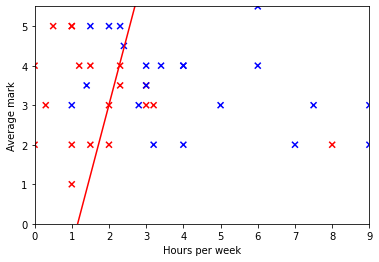

Wall time: 1.25 s


'Total accuracy: 35.0%'

In [7]:
%%time
l = 0.001
iterations = range(10000)

cost = []
for i in iterations:
    y = prediction(x_train, w)
    
    gd = np.dot(design_matrix(x_train).T, y - y_train)
    gd /= x_train.shape[0]
    gd *= l

    w -= gd.T
    cost.append(- np.sum( np.multiply(np.log(y), y_train) + np.multiply(np.log(1 - y), (1 - y_train)) ) / x_train.shape[0])

plot_model(x_train, y_train, w)

f'Total accuracy: {accuracy(x_train, w, y_train)}%'

Plot error changing on each iteration

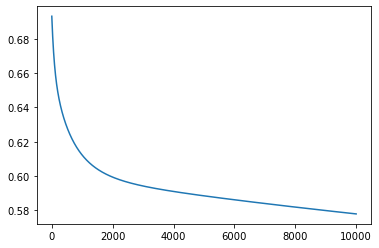

In [8]:
plt.plot(iterations, cost)
plt.show()